# Time-series to Supervised Learning problem


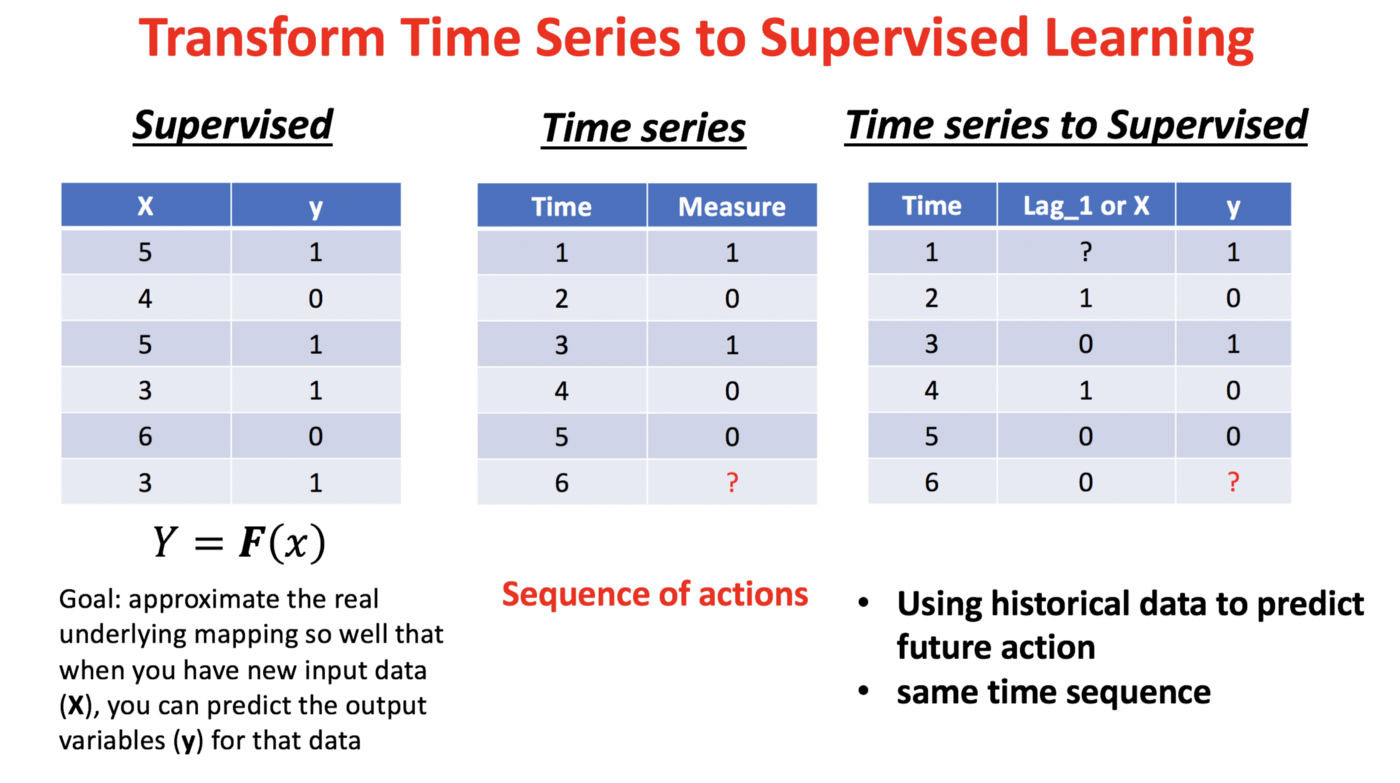

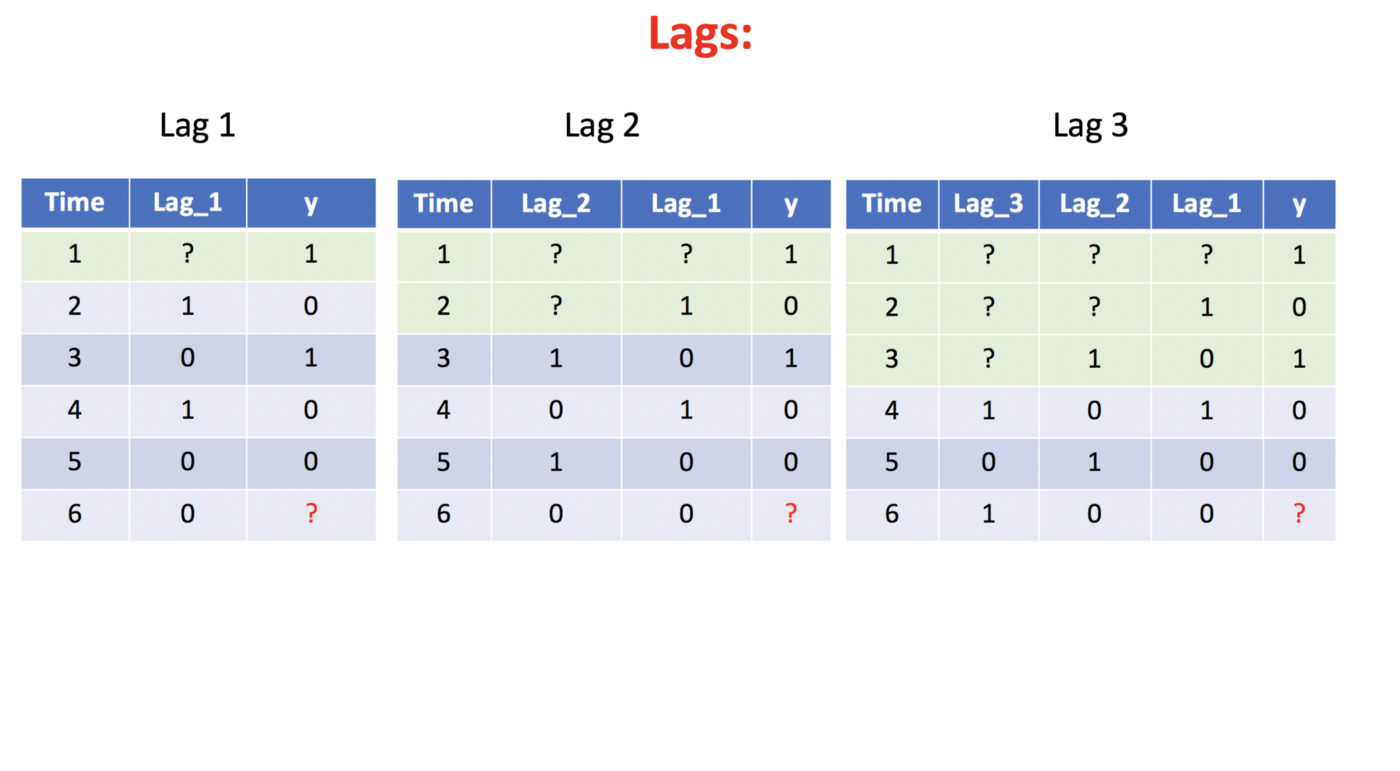

## Sliding window

- Việc sử dụng các bước thời gian trước đó để dự đoán bước thời gian tiếp theo được gọi là phương pháp cửa sổ trượt (sliding window method). Đôi khi, viết tắt của nó có thể được gọi là phương pháp cửa sổ (window method) trong một số tài liệu. Trong thống kê và phân tích chuỗi thời gian, phương pháp này được gọi là phương pháp trễ hoặc phương pháp trễ thời gian (lag or lag method.)

- Số bước thời gian trước đó được gọi là chiều rộng cửa sổ (window width) hoặc kích thước của trễ (size of the lag).





Cửa sổ trượt (sliding window) này là cơ sở để chuyển đổi bất kỳ bộ dữ liệu chuỗi thời gian (time series dataset) nào thành một bài toán học có giám sát (supervised learning). Từ ví dụ đơn giản này, chúng ta có thể nhận thấy một số điều sau:

- Chúng ta có thể thấy cách điều này có thể hoạt động để chuyển đổi một chuỗi thời gian thành một bài toán học có giám sát phân loại hoặc hồi quy (regression or a classification) cho các giá trị chuỗi thời gian được xác định hoặc có nhãn.

- Chúng ta có thể thấy cách một khi tập dữ liệu chuỗi thời gian được chuẩn bị theo cách này, bất kỳ thuật toán học máy tuyến tính và phi tuyến (linear and nonlinear machine learning) nào cũng có thể được áp dụng, miễn là thứ tự các hàng (order of the rows) được bảo tồn.

- Chúng ta có thể thấy cách tăng kích thước của cửa sổ trượt để bao gồm nhiều bước thời gian trước đó hơn.

- Chúng ta có thể thấy cách tiếp cận cửa sổ trượt có thể được sử dụng trên một chuỗi thời gian có nhiều giá trị hoặc được gọi là chuỗi thời gian đa biến (multivariate time series).




### Pandas shift() function

Cho một DataFrame, chức năng shift() có thể được sử dụng để tạo các bản sao của các cột được đẩy về phía trước (các hàng giá trị NaN được thêm vào phía trước) hoặc đẩy lùi (các hàng giá trị NaN được thêm vào phía sau).


In [2]:
import pandas as pd
df = pd.DataFrame()

df['t'] = [x for x in range(10)]
print(df)

   t
0  0
1  1
2  2
3  3
4  4
5  5
6  6
7  7
8  8
9  9


Chúng ta có thể dịch chuyển tất cả các quan sát (observations) xuống một bước thời gian bằng cách chèn một hàng mới ở đầu tiên. Vì hàng mới không có dữ liệu, chúng ta có thể sử dụng NaN để đại diện cho "không có dữ liệu".

Hàm shift() có thể làm điều này cho chúng ta và chúng ta có thể chèn cột đã dịch chuyển này bên cạnh chuỗi ban đầu của chúng ta.



In [3]:
df['t-1'] = df['t'].shift(1)
print(df)

   t  t-1
0  0  NaN
1  1  0.0
2  2  1.0
3  3  2.0
4  4  3.0
5  5  4.0
6  6  5.0
7  7  6.0
8  8  7.0
9  9  8.0


- Chúng ta có thể thấy rằng việc dịch chuyển chuỗi xuống phía trước một bước thời gian sẽ cho chúng ta một bài toán học có giám sát nguyên thủy, mặc dù với X và y không đúng thứ tự.

- Bỏ qua cột nhãn hàng. Hàng đầu tiên sẽ phải bị bỏ qua vì giá trị NaN. Hàng thứ hai cho thấy giá trị đầu vào của 0,0 trong cột thứ hai (đầu vào hoặc X) và giá trị 1 trong cột đầu tiên (đầu ra hoặc y).


- Chúng ta có thể thấy rằng nếu chúng ta có thể lặp lại quá trình này với các dịch chuyển của 2, 3 và nhiều hơn nữa, chúng ta có thể tạo ra các chuỗi đầu vào dài (X) có thể được sử dụng để dự báo giá trị đầu ra (y).

- Toán tử shift cũng có thể chấp nhận một giá trị số nguyên âm. Điều này có tác dụng kéo các quan sát lên bằng cách chèn các hàng mới vào cuối. Dưới đây là một ví dụ:


In [4]:
df['t+1'] = df['t'].shift(-1)
print(df)

   t  t-1  t+1
0  0  NaN  1.0
1  1  0.0  2.0
2  2  1.0  3.0
3  3  2.0  4.0
4  4  3.0  5.0
5  5  4.0  6.0
6  6  5.0  7.0
7  7  6.0  8.0
8  8  7.0  9.0
9  9  8.0  NaN


- Kỹ thuật dự báo chuỗi thời gian, thời điểm hiện tại (t) và thời điểm tương lai (t+1,.. t+n) được gọi là thời điểm dự báo, trong khi các quan sát trong quá khứ (t-1,.. t-n) được sử dụng để thực hiện dự báo.



### Series-to-supervised() function

The function takes four arguments:

* **data**: Sequence of observations as a list or 2D NumPy array. Required.
* **n_in**: Number of lag observations as input (X). Values may be between [1..len(data)] Optional. Defaults to 1.
* **n_out**: Number of observations as output (y). Values may be between [0..len(data)-1]. Optional. Defaults to 1.
* **dropnan**: Boolean whether or not to drop rows with NaN values. Optional. Defaults to True.

The function returns a single value:

* **return**: Pandas DataFrame of series framed for supervised learning.


In [5]:
import pandas as pd

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

### Univariate Time-series

- Sử dụng 1 loại biến (1 loại features) để làm đầu vào input

#### One-Step Forecasting

Dự đoán kết quả tại 1 thời điểm duy nhất trong tương lại. Ví dụ như lấy giá trị tại các thời điểm trước đó (t-1, t-2,...) để dự đoán tại thời điểm hiện tại (t)



- **Single-head Forecasting**: Dự đoán tại thời điểm hiện tại (t)


- **Multi-head Forecasting**: Dự đoán tại thời điểm trong tương lai xa hơn (t+1) hoặc (t+2) hoặc (t+n).



In [6]:
values = [x for x in range(10)]
data = series_to_supervised(values, n_in=1, n_out=1)
print(data)

   var1(t-1)  var1(t)
1        0.0        1
2        1.0        2
3        2.0        3
4        3.0        4
5        4.0        5
6        5.0        6
7        6.0        7
8        7.0        8
9        8.0        9


In [7]:
values = [x for x in range(10)]
data = series_to_supervised(values, n_in=3, n_out=1)
print(data)

   var1(t-3)  var1(t-2)  var1(t-1)  var1(t)
3        0.0        1.0        2.0        3
4        1.0        2.0        3.0        4
5        2.0        3.0        4.0        5
6        3.0        4.0        5.0        6
7        4.0        5.0        6.0        7
8        5.0        6.0        7.0        8
9        6.0        7.0        8.0        9


#### Multi-Step (Sequence) Forecasting

Dự đoán kết quả nhiều thời điểm (chuỗi thời điểm) trong tương lại. Ví dụ như lấy giá trị tại các thời điểm trước đó (t-1, t-2,...) để dự đoán tại thời điểm (t, t+1, t+2).

In [8]:
values = [x for x in range(10)]
data = series_to_supervised(values, n_in=2, n_out=2)
print(data)

   var1(t-2)  var1(t-1)  var1(t)  var1(t+1)
2        0.0        1.0        2        3.0
3        1.0        2.0        3        4.0
4        2.0        3.0        4        5.0
5        3.0        4.0        5        6.0
6        4.0        5.0        6        7.0
7        5.0        6.0        7        8.0
8        6.0        7.0        8        9.0


In [9]:
values = [x for x in range(10)]
data = series_to_supervised(values, n_in=2, n_out=4)
print(data)

   var1(t-2)  var1(t-1)  var1(t)  var1(t+1)  var1(t+2)  var1(t+3)
2        0.0        1.0        2        3.0        4.0        5.0
3        1.0        2.0        3        4.0        5.0        6.0
4        2.0        3.0        4        5.0        6.0        7.0
5        3.0        4.0        5        6.0        7.0        8.0
6        4.0        5.0        6        7.0        8.0        9.0


### Multivariate Time-series

- Sử dụng nhiều loại biến (nhiều loại features) để làm đầu vào input

Trong bài toán này dạng này có rất nhiều bài toán nhỏ khác có thể bóc tách ra ví dụ như:

- Dùng nhiều đầu vào của nhiều biến, và dự đoán đầu ra của 1 biến (có thể là single-step hoặc multi-step). Hoặc dự đoán đầu ra của nhiều biến (tương tự cũng có thể là single-step hoặc multi-step forecasting).

In [10]:
raw = pd.DataFrame()
raw['ob1'] = [x for x in range(10)]
raw['ob2'] = [x for x in range(50, 60)]
values = raw.values

data = series_to_supervised(values, n_in=1, n_out=1)
print(data)

   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        0.0       50.0        1       51
2        1.0       51.0        2       52
3        2.0       52.0        3       53
4        3.0       53.0        4       54
5        4.0       54.0        5       55
6        5.0       55.0        6       56
7        6.0       56.0        7       57
8        7.0       57.0        8       58
9        8.0       58.0        9       59


In [11]:
raw = pd.DataFrame()
raw['ob1'] = [x for x in range(10)]
raw['ob2'] = [x for x in range(50, 60)]

values = raw.values
data = series_to_supervised(values, n_in=1, n_out=2)
print(data)

   var1(t-1)  var2(t-1)  var1(t)  var2(t)  var1(t+1)  var2(t+1)
1        0.0       50.0        1       51        2.0       52.0
2        1.0       51.0        2       52        3.0       53.0
3        2.0       52.0        3       53        4.0       54.0
4        3.0       53.0        4       54        5.0       55.0
5        4.0       54.0        5       55        6.0       56.0
6        5.0       55.0        6       56        7.0       57.0
7        6.0       56.0        7       57        8.0       58.0
8        7.0       57.0        8       58        9.0       59.0


## Rolling Window Statistics

- Một bước tiến xa hơn so với việc thêm các giá trị trễ (lagged) thô là thêm một tóm tắt (summary) của các giá trị tại các thời điểm trước đó.

- Chúng ta có thể tính toán các thống kê tóm tắt (summary statistics) trên các giá trị trong cửa sổ trượt và bao gồm chúng như các đặc trưng trong tập dữ liệu của chúng ta. Có lẽ phương pháp hữu ích nhất là trung bình (mean) của một số giá trị trước đó, còn được gọi là trung bình trượt (rolling mean).

- Ví dụ, chúng ta có thể tính toán trung bình của hai giá trị trước đó và sử dụng nó để dự đoán giá trị tiếp theo.

Pandas cung cấp một hàm **rolling()** tạo ra một cấu trúc dữ liệu mới với cửa sổ các giá trị tại mỗi thời điểm. Sau đó, chúng ta có thể thực hiện các hàm thống kê trên cửa sổ các giá trị được thu thập cho mỗi bước thời gian, chẳng hạn như tính trung bình.
- Đầu tiên, chuỗi phải được dịch chuyển (shifted).
- Sau đó, tập dữ liệu trượt (rolling dataset) có thể được tạo ra và các giá trị trung bình được tính trên mỗi cửa sổ hai giá trị.



In [12]:
import pandas as pd

temps = pd.DataFrame()
temps['val'] = [x for x in range(100)]

shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = pd.concat([means, temps], axis=1)

dataframe.columns = ['mean(t-2,t-1)', 't+1']
print(dataframe.head(10))

   mean(t-2,t-1)  t+1
0            NaN    0
1            NaN    1
2            0.5    2
3            1.5    3
4            2.5    4
5            3.5    5
6            4.5    6
7            5.5    7
8            6.5    8
9            7.5    9


- Có nhiều thống kê khác chúng ta có thể tính toán và thậm chí cách tính toán định nghĩa "cửa sổ" khác nhau.

- Dưới đây là một ví dụ khác cho thấy một chiều rộng cửa sổ là 3 và một bộ dữ liệu bao gồm nhiều thống kê tóm tắt, cụ thể là giá trị tối thiểu, trung bình và tối đa (**minimum**, **mean**, and **maximum**) trong cửa sổ.

- Trong trường hợp này, chiều rộng cửa sổ là 3, điều này có nghĩa là chúng ta phải dịch chuỗi về phía trước 2 bước thời gian. Điều này làm cho hai hàng đầu tiên trở thành NaN.
- Tiếp theo, chúng ta cần tính toán thống kê cửa sổ với 3 giá trị cho mỗi cửa sổ. Chúng ta cần có 3 hàng để có đủ dữ liệu từ chuỗi trong cửa sổ để bắt đầu tính toán thống kê.


In [13]:
import pandas as pd

temps = pd.DataFrame()
temps['val'] = [x for x in range(100)]

width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)

dataframe = pd.concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(10))

   min  mean  max  t+1
0  NaN   NaN  NaN    0
1  NaN   NaN  NaN    1
2  NaN   NaN  NaN    2
3  NaN   NaN  NaN    3
4  0.0   1.0  2.0    4
5  1.0   2.0  3.0    5
6  2.0   3.0  4.0    6
7  3.0   4.0  5.0    7
8  4.0   5.0  6.0    8
9  5.0   6.0  7.0    9


## Expanding Window Statistics

- Một loại cửa sổ khác có thể hữu ích bao gồm tất cả dữ liệu trước đó trong chuỗi.

- Đây được gọi là một cửa sổ mở rộng và có thể giúp giữ cho các ranh giới của dữ liệu quan sát được. Giống như hàm rolling() trên DataFrame, Pandas cung cấp một hàm **expanding()** thu thập các bộ giá trị trước đó cho mỗi bước thời gian.

- Các danh sách các số trước đó này có thể được tóm tắt và bao gồm như các đặc trưng mới. Ví dụ, dưới đây là các danh sách số trong cửa sổ mở rộng cho 5 bước thời gian đầu tiên của chuỗi:


In [14]:
#, Window Values
1, 20.7
2, 20.7, 17.9,
3, 20.7, 17.9, 18.8
4, 20.7, 17.9, 18.8, 14.6
5, 20.7, 17.9, 18.8, 14.6, 15.8

(5, 20.7, 17.9, 18.8, 14.6, 15.8)

- Một lần nữa, bạn có thể thấy rằng chúng ta phải dịch chuỗi một bước thời gian để đảm bảo giá trị đầu ra mà chúng ta muốn dự đoán không được bao gồm trong các giá trị cửa sổ này. Do đó, các cửa sổ đầu vào trông như sau:


In [15]:
#, Window Values
# 1, NaN
# 2, NaN, 20.7
# 3, NaN, 20.7, 17.9,
# 4, NaN, 20.7, 17.9, 18.8
# 5, NaN, 20.7, 17.9, 18.8, 14.6

In [16]:
# create expanding window features
import pandas as pd

temps = pd.DataFrame()
temps['val'] = [x for x in range(100)]

window = temps.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(10))

   min  mean  max   t+1
0  0.0   0.0  0.0   1.0
1  0.0   0.5  1.0   2.0
2  0.0   1.0  2.0   3.0
3  0.0   1.5  3.0   4.0
4  0.0   2.0  4.0   5.0
5  0.0   2.5  5.0   6.0
6  0.0   3.0  6.0   7.0
7  0.0   3.5  7.0   8.0
8  0.0   4.0  8.0   9.0
9  0.0   4.5  9.0  10.0


## References

1. https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
2. https://machinelearningmastery.com/time-series-forecasting-supervised-learning/
3. https://machinelearningmastery.com/basic-feature-engineering-time-series-data-python/
4. https://towardsdatascience.com/time-series-machine-learning-regression-framework-9ea33929009a
5. https://machinelearningmastery.com/how-to-develop-autoregressive-forecasting-models-for-multi-step-air-pollution-time-series-forecasting/
6. https://www.cienciadedatos.net/documentos/py27-time-series-forecasting-python-scikitlearn.html
7. https://speakerdeck.com/rasbt/slides-from-machine-learning-with-scikit-learn-at-scipy-2016

# Scikit-Learn

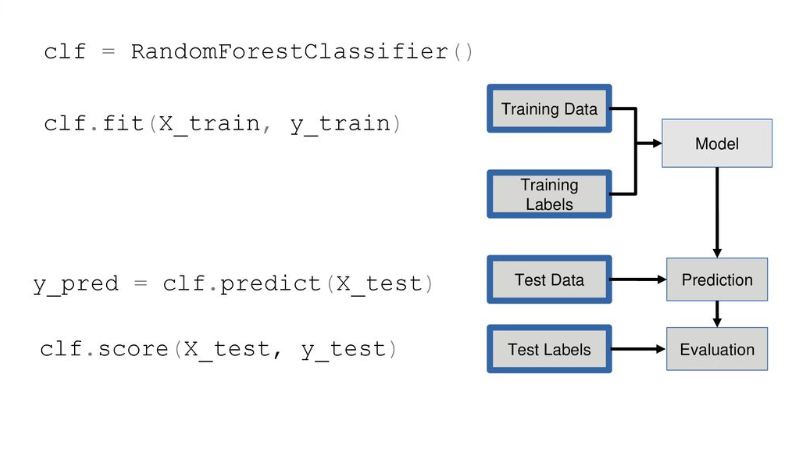

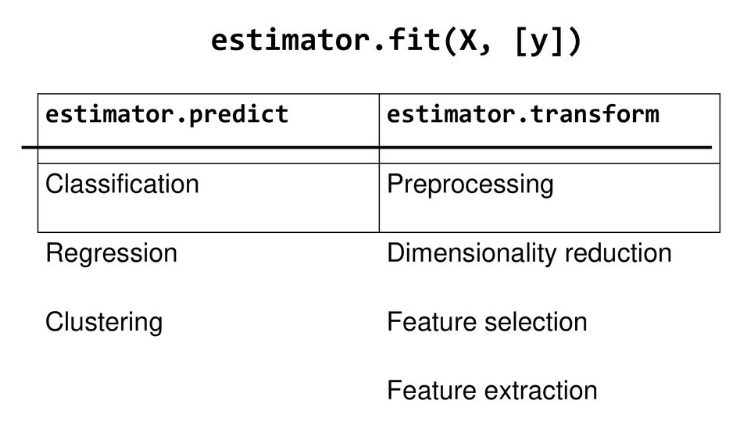

## Dataset

In [17]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})


In [18]:
def get_df():
    df = pd.read_csv("AirPassengers.csv")
    df.head()
    df.columns = ['date','#passengers']
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month
    return df

df = get_df()
df.head(10)

,date,#passengers,year,month
0,1949-01-01,112,1949,1
1,1949-02-01,118,1949,2
2,1949-03-01,132,1949,3
3,1949-04-01,129,1949,4
4,1949-05-01,121,1949,5
5,1949-06-01,135,1949,6
6,1949-07-01,148,1949,7
7,1949-08-01,148,1949,8
8,1949-09-01,136,1949,9
9,1949-10-01,119,1949,10


In [19]:
# First Order Differencing
df = get_df()
ts_diff = np.diff(df['#passengers'])
df['#passengers_diff1'] = np.append([0], ts_diff)
dataset = pd.DataFrame(df['#passengers'])

In [20]:
data = series_to_supervised(dataset, n_in=3, n_out=1)
print(data)

     var1(t-3)  var1(t-2)  var1(t-1)  var1(t)
3        112.0      118.0      132.0      129
4        118.0      132.0      129.0      121
5        132.0      129.0      121.0      135
6        129.0      121.0      135.0      148
7        121.0      135.0      148.0      148
..         ...        ...        ...      ...
139      472.0      535.0      622.0      606
140      535.0      622.0      606.0      508
141      622.0      606.0      508.0      461
142      606.0      508.0      461.0      390
143      508.0      461.0      390.0      432

[141 rows x 4 columns]


In [21]:
X, Y = data[['var1(t-3)', 'var1(t-2)', 'var1(t-1)']], data['var1(t)']
print(X, Y)

     var1(t-3)  var1(t-2)  var1(t-1)
3        112.0      118.0      132.0
4        118.0      132.0      129.0
5        132.0      129.0      121.0
6        129.0      121.0      135.0
7        121.0      135.0      148.0
..         ...        ...        ...
139      472.0      535.0      622.0
140      535.0      622.0      606.0
141      622.0      606.0      508.0
142      606.0      508.0      461.0
143      508.0      461.0      390.0

[141 rows x 3 columns] 3      129
4      121
5      135
6      148
7      148
      ... 
139    606
140    508
141    461
142    390
143    432
Name: var1(t), Length: 141, dtype: int64


## AdaBoostRegressor

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import AdaBoostRegressor

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)

# Initialize the estimator
estimator = AdaBoostRegressor(n_estimators=500, learning_rate=0.05)

# Fit the data
estimator.fit(X_train, Y_train)

# Make predictions
pred = estimator.predict(X_test)

# Calculate metrics
print(mean_squared_error(Y_test, pred))
print(mean_absolute_percentage_error(Y_test, pred))
print(r2_score(Y_test, pred))

7174.68206543775
0.1283350725741243
-0.1753123014722502


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

def draw_true_predict(y_true, y_pred):
    size = len(y_true)
    plt.plot(list(range(size)), y_true, label='real', color='blue')
    plt.plot(list(range(size)), y_pred, label='predicted', color='red')
    plt.legend(loc='best')
    plt.title('Real vs Predicted values')
    plt.show()

def calculate_metrics(y_true, y_pred):
    # Calculate metrics
    MSE = mean_squared_error(Y_test, pred)
    MAPE = mean_absolute_percentage_error(Y_test, pred)
    R2 = r2_score(Y_test, pred)
    print(f"MSE: {MSE}, MAPE: {MAPE}, R2: {R2}")

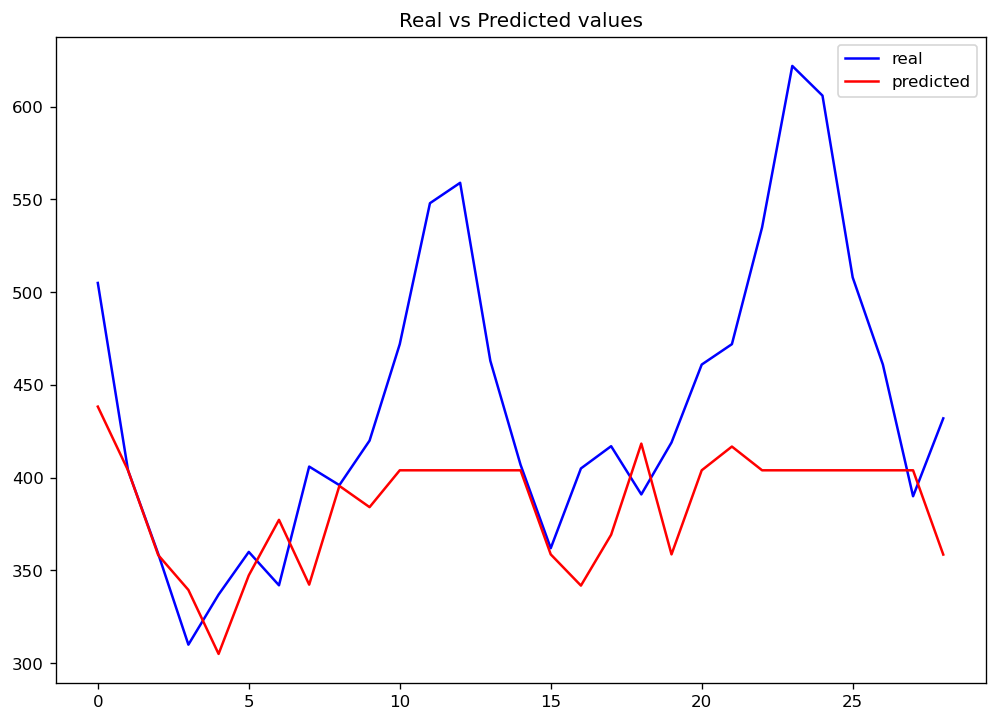

In [24]:
draw_true_predict(Y_test, pred)

## RandomForest Regressor

MSE: 6158.494086206896, MAPE: 0.12404328810216557, R2: -0.008846634881715332


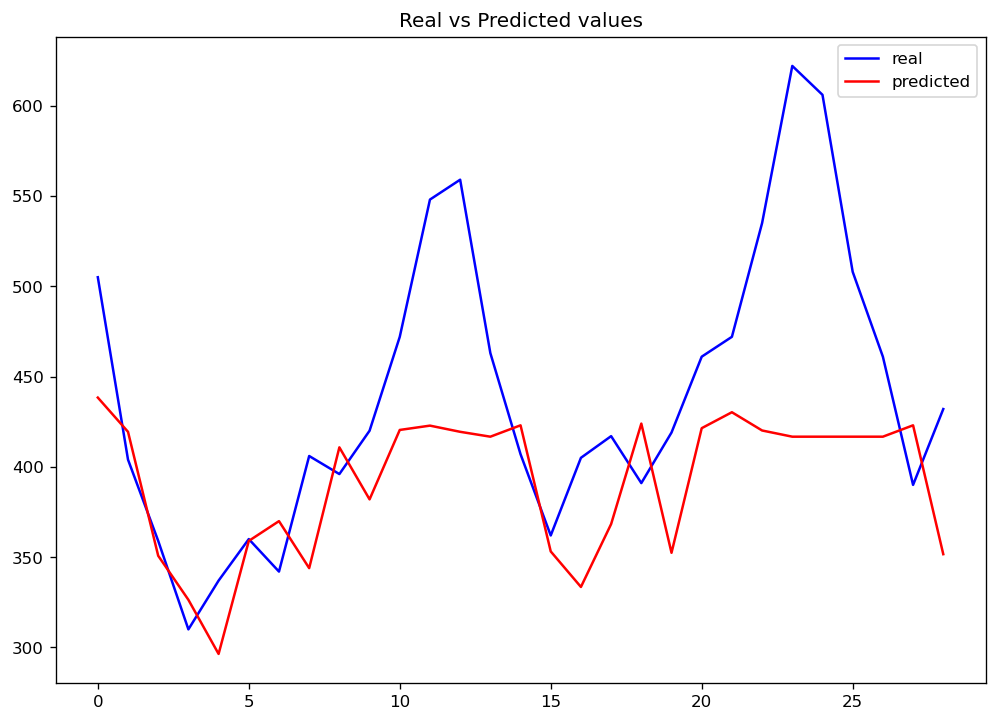

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)

# Initialize the estimator
estimator = RandomForestRegressor()

# Fit the data
estimator.fit(X_train, Y_train)

# Make predictions
pred = estimator.predict(X_test)

# Calculate metrics
calculate_metrics(Y_test, pred)

draw_true_predict(Y_test, pred)

## Scaling STD/minmax

     var1(t-3)  var1(t-2)  var1(t-1)
3        112.0      118.0      132.0
4        118.0      132.0      129.0
5        132.0      129.0      121.0
6        129.0      121.0      135.0
7        121.0      135.0      148.0
..         ...        ...        ...
139      472.0      535.0      622.0
140      535.0      622.0      606.0
141      622.0      606.0      508.0
142      606.0      508.0      461.0
143      508.0      461.0      390.0

[141 rows x 3 columns] 3      129
4      121
5      135
6      148
7      148
      ... 
139    606
140    508
141    461
142    390
143    432
Name: var1(t), Length: 141, dtype: int64
MSE: 6158.494086206896, MAPE: 0.12404328810216557, R2: -0.008846634881715332


/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


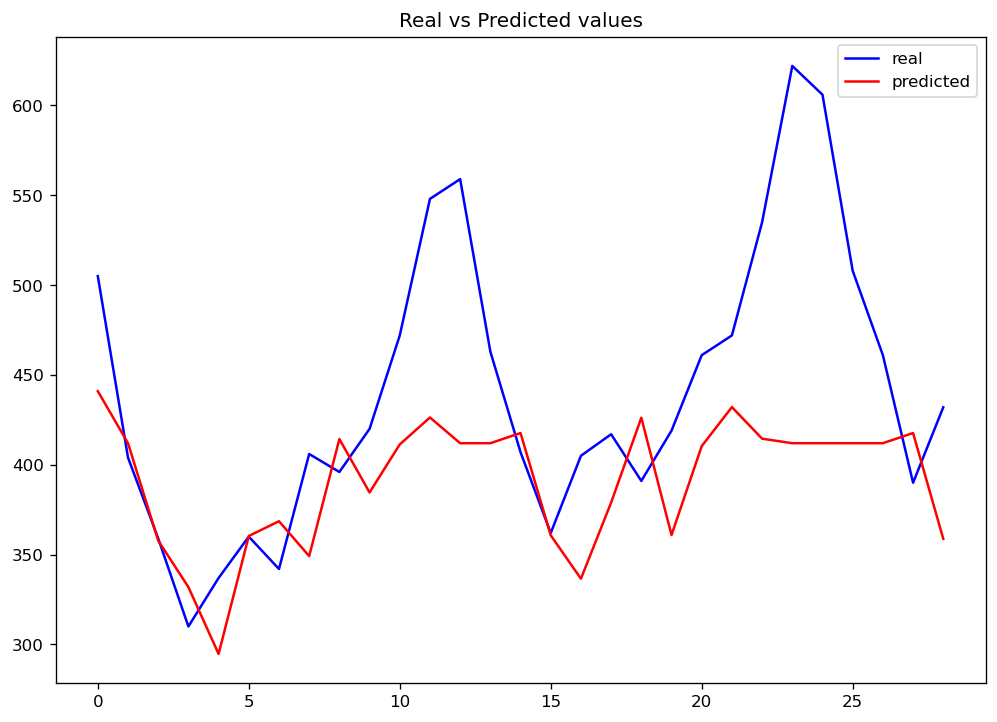

In [26]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, Y = data[['var1(t-3)', 'var1(t-2)', 'var1(t-1)']], data['var1(t)']
print(X, Y)
X = X.values
Y = Y.values

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)
Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

scaler_feature = StandardScaler()
scaler_feature.fit(X_train)
X_train_scaled = scaler_feature.transform(X_train)
X_test_scaled = scaler_feature.transform(X_test)

scaler_label = StandardScaler()
scaler_label.fit(Y_train)
Y_train_scaled = scaler_label.transform(Y_train)
Y_test_scaled = scaler_label.transform(Y_test)


# Initialize the estimator
estimator = RandomForestRegressor()

# Fit the data
estimator.fit(X_train_scaled, Y_train_scaled)

# Make predictions
y_pred = estimator.predict(X_test_scaled)
y_pred_unscaled = scaler_label.inverse_transform(np.reshape(y_pred, (-1, 1)))

# Calculate metrics
calculate_metrics(Y_test, y_pred_unscaled)

draw_true_predict(Y_test, y_pred_unscaled)

## SVR

MSE: 0.9104991639727614, MAPE: 0.4718367135005406, R2: -1.094226159177655


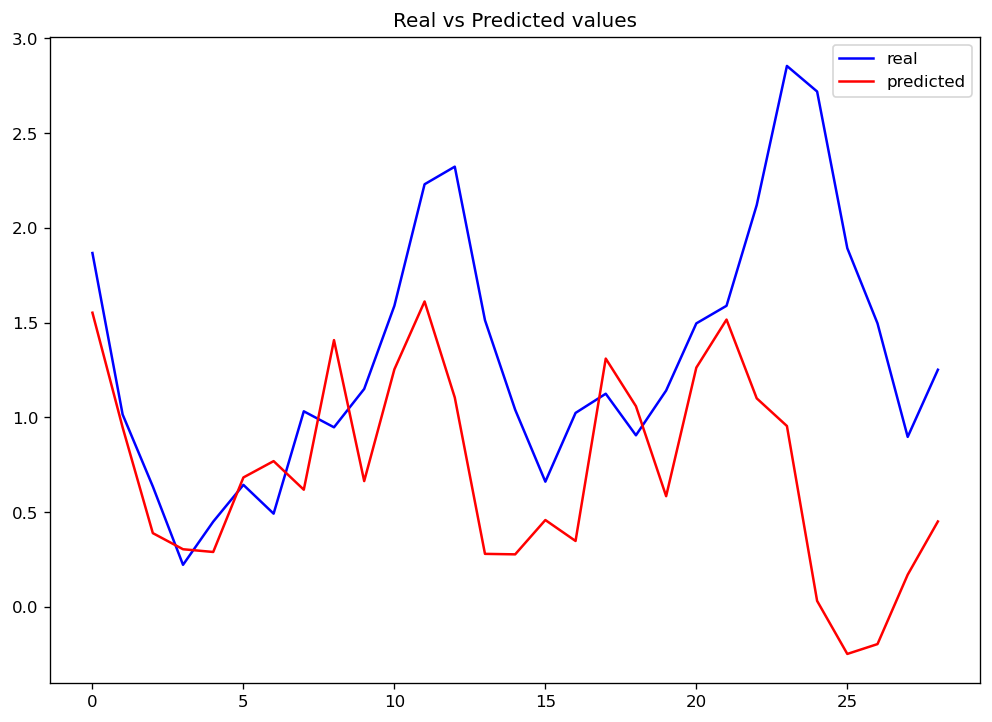

In [27]:
from sklearn.preprocessing import scale
from sklearn.svm import SVR

x = scale(X)
y = scale(Y)

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=0)

# Initialize the estimator
estimator = rfr = SVR(C=10, epsilon=0.1)

# Fit the data
estimator.fit(X_train, Y_train)

# Make predictions
pred = estimator.predict(X_test)

# Calculate metrics
calculate_metrics(Y_test, pred)

draw_true_predict(Y_test, pred)

## GridSearchCV (Hyper-parameter tuning)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ..C=0.1, epsilon=0.1, kernel=rbf;, score=-16.565 total time=   0.0s
[CV 2/5] END ...C=0.1, epsilon=0.1, kernel=rbf;, score=-0.141 total time=   0.0s
[CV 3/5] END ...C=0.1, epsilon=0.1, kernel=rbf;, score=-0.247 total time=   0.0s
[CV 4/5] END ....C=0.1, epsilon=0.1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 5/5] END ...C=0.1, epsilon=0.1, kernel=rbf;, score=-2.305 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, kernel=linear;, score=-0.623 total time=   0.0s
[CV 2/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.286 total time=   0.0s
[CV 3/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.287 total time=   0.0s
[CV 4/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.611 total time=   0.0s
[CV 5/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.341 total time=   0.0s
[CV 1/5] END .C=0.1, epsilon=0.1, kernel=poly;, score=-18.026 total time=   0.0s
[CV 2/5] END ..C=0.1, epsilon=0.1, kernel=poly

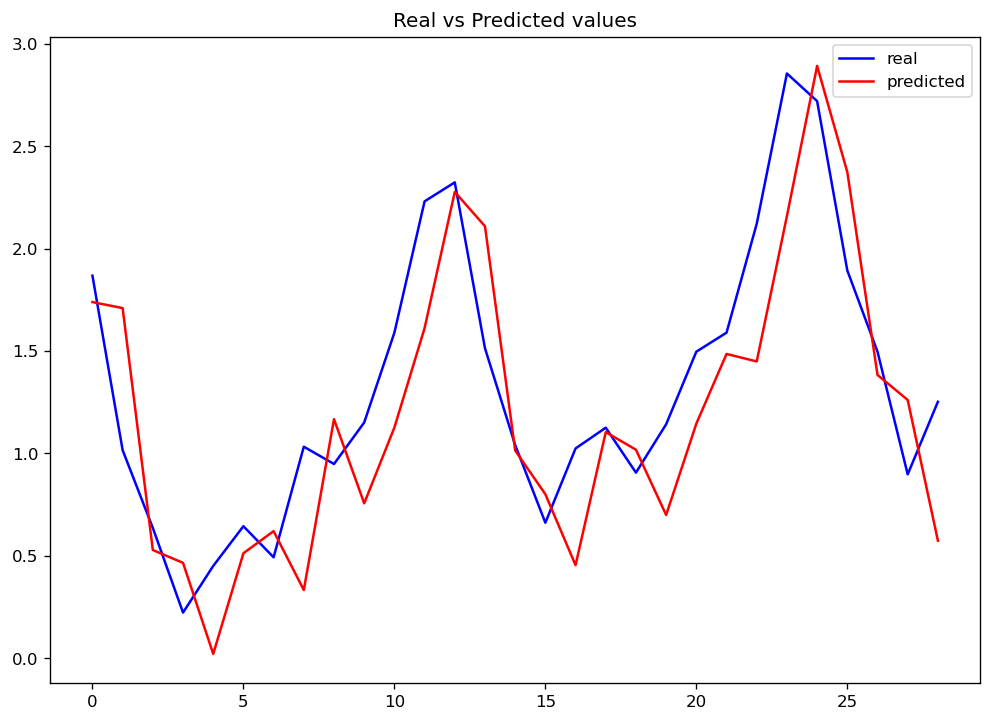

In [28]:
## Hyper-parameter tuning using GridSearchCV

from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

x = scale(X)
y = scale(Y)

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=0)

# defining parameter range
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.1, 0.2, 0.3, 0.5, 1.0],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# defining the gridsearchCV object
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)

# Fit the data
grid.fit(X_train, Y_train)

# Make predictions
pred = grid.predict(X_test)

# Calculate metrics
calculate_metrics(Y_test, pred)

draw_true_predict(Y_test, pred)

## Pipeline



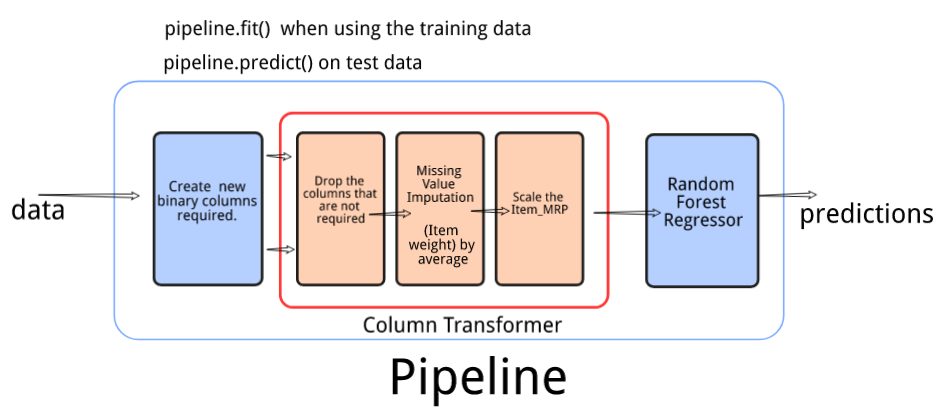

MSE: 1.1488131731416207, MAPE: 0.5579578749161699, R2: -1.6423688174556572


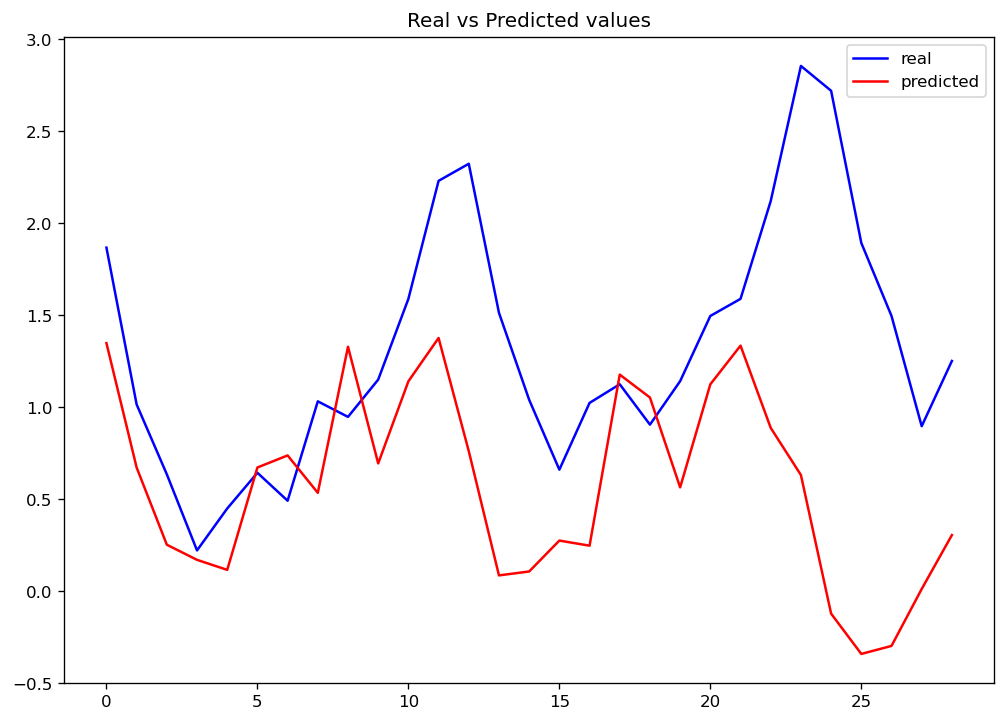

In [29]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=0)

# Make pipeline
pipe = make_pipeline(StandardScaler(), SVR(C=10, epsilon=0.2))
pipe.fit(X_train, Y_train)

# Make predictions
pred = pipe.predict(X_test)

# Calculate metrics
calculate_metrics(Y_test, pred)

draw_true_predict(Y_test, pred)


## GridSearchCV + Pipeline

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=-16.579 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=-0.152 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=-0.265 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.516 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=-2.322 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=-0.254 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.322 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.308 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.642 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.481 total time=   0

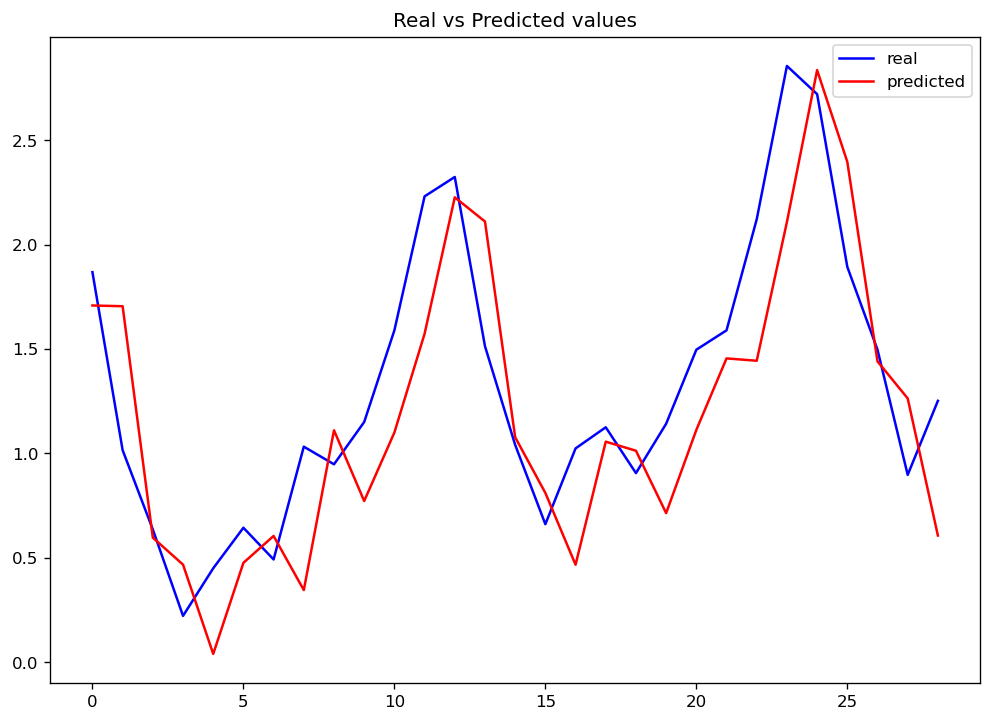

In [30]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV


#++++++++++++++++++++++++++++++++++++
#+ create train and test sets
#++++++++++++++++++++++++++++++++++++
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=0)


#++++++++++++++++++++++++++++++++
# create the pipeline object
#++++++++++++++++++++++++++++++++
steps = [('scaler', StandardScaler()), ('SVR', SVR())]
pipeline = Pipeline(steps)


#++++++++++++++++++++++++++++++++++++++
#+ create the hyperparameter space
#++++++++++++++++++++++++++++++++++++++
parameteres = {
    'SVR__C': [0.1, 1, 10, 100, 1000],
    'SVR__epsilon': [0.1, 0.2, 0.3, 0.5, 1.0],
    'SVR__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

#++++++++++++++++++++++++++++++
#+ Grid Search Cross Validation
#++++++++++++++++++++++++++++++
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5, verbose=3)

# Fit the data
grid.fit(X_train, Y_train)

# get the best parameters
print(grid.best_params_)

# Make predictions
pred = grid.predict(X_test)

# Calculate metrics
calculate_metrics(Y_test, pred)

draw_true_predict(Y_test, pred)

# Bài tập

Sử dụng 1 bộ dữ liệu time-series bất kì (1 biến hoặc nhiều biến).
tại link (https://github.com/thieu1995/csv-files/).

Chọn một model regression bất kì trên scikit-learn (https://scikit-learn.org/stable/search.html?q=regression)

Áp dụng các kĩ thuật trên lớp vào bộ dữ liệu time-series trên.

1. Scaling, (1 điểm)

2. Building, (1 điểm)

3. Hyper-parameter tuning, (2 điểm)

4. Pipeline, (1 điểm)

5. GridsearchCV, (1 điểm)

6. Forecasting, (1 điểm)

7. Calculate Metrics ví dụ như RMSE, MSE, MAE, MAPE (2 điểm)

8. Vẽ đồ thị giá trị thực tế và dự đoán (1 điểm)



In [1]:
df = pd.read_csv('AirPassengers.csv')
df.head()


NameError: name 'pd' is not defined

In [ ]:
import numpy as np

values = df['#Passengers'].values
values = values.reshape((len(values), 1))
data = series_to_supervised(values, n_in=3, n_out=1)
print(data)

     var1(t-3)  var1(t-2)  var1(t-1)  var1(t)
3        112.0      118.0      132.0      129
4        118.0      132.0      129.0      121
5        132.0      129.0      121.0      135
6        129.0      121.0      135.0      148
7        121.0      135.0      148.0      148
..         ...        ...        ...      ...
139      472.0      535.0      622.0      606
140      535.0      622.0      606.0      508
141      622.0      606.0      508.0      461
142      606.0      508.0      461.0      390
143      508.0      461.0      390.0      432

[141 rows x 4 columns]


In [ ]:
X, Y = data[['var1(t-3)', 'var1(t-2)', 'var1(t-1)']], data['var1(t)']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)
Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

Scalling

In [ ]:
# scalling the data
scaler_feature = StandardScaler()
scaler_feature.fit(X_train)
X_train_scaled = scaler_feature.transform(X_train)
X_test_scaled = scaler_feature.transform(X_test)

scaler_label = StandardScaler()
scaler_label.fit(Y_train)
Y_train_scaled = scaler_label.transform(Y_train)
Y_test_scaled = scaler_label.transform(Y_test)

GridSearchCV (Hyper-parameter tuning), compute metrics and draw

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END ..C=0.1, epsilon=0.1, kernel=rbf;, score=-20.460 total time=   0.0s
[CV 2/5] END ...C=0.1, epsilon=0.1, kernel=rbf;, score=-0.118 total time=   0.0s
[CV 3/5] END ...C=0.1, epsilon=0.1, kernel=rbf;, score=-0.211 total time=   0.0s
[CV 4/5] END ....C=0.1, epsilon=0.1, kernel=rbf;, score=0.499 total time=   0.0s
[CV 5/5] END ...C=0.1, epsilon=0.1, kernel=rbf;, score=-2.758 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, kernel=linear;, score=-0.272 total time=   0.0s
[CV 2/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.265 total time=   0.0s
[CV 3/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.285 total time=   0.0s
[CV 4/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.643 total time=   0.0s
[CV 5/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.402 total time=   0.0s
[CV 1/5] END .C=0.1, epsilon=0.1, kernel=poly;, score=-13.374 total time=   0.0s
[CV 2/5] END ..C=0.1, epsilon=0.1, kernel=poly;

/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataC

[CV 1/5] END ..C=10, epsilon=0.1, kernel=linear;, score=0.133 total time=   0.0s
[CV 2/5] END ..C=10, epsilon=0.1, kernel=linear;, score=0.351 total time=   0.0s
[CV 3/5] END ..C=10, epsilon=0.1, kernel=linear;, score=0.450 total time=   0.0s
[CV 4/5] END ..C=10, epsilon=0.1, kernel=linear;, score=0.651 total time=   0.0s
[CV 5/5] END ..C=10, epsilon=0.1, kernel=linear;, score=0.539 total time=   0.0s
[CV 1/5] END ..C=10, epsilon=0.1, kernel=poly;, score=-15.139 total time=   0.0s
[CV 2/5] END ...C=10, epsilon=0.1, kernel=poly;, score=-2.821 total time=   0.0s
[CV 3/5] END ...C=10, epsilon=0.1, kernel=poly;, score=-0.224 total time=   0.0s
[CV 4/5] END ...C=10, epsilon=0.1, kernel=poly;, score=-1.170 total time=   0.0s
[CV 5/5] END ...C=10, epsilon=0.1, kernel=poly;, score=-6.383 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.1, kernel=sigmoid;, score=-77698.564 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.1, kernel=sigmoid;, score=-16410.641 total time=   0.0s
[CV 3/5] END C=10, e

/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataC

[CV 1/5] END .C=100, epsilon=0.1, kernel=linear;, score=0.197 total time=   0.0s
[CV 2/5] END .C=100, epsilon=0.1, kernel=linear;, score=0.351 total time=   0.0s
[CV 3/5] END .C=100, epsilon=0.1, kernel=linear;, score=0.450 total time=   0.0s
[CV 4/5] END .C=100, epsilon=0.1, kernel=linear;, score=0.651 total time=   0.0s
[CV 5/5] END .C=100, epsilon=0.1, kernel=linear;, score=0.539 total time=   0.0s
[CV 1/5] END .C=100, epsilon=0.1, kernel=poly;, score=-18.092 total time=   0.0s
[CV 2/5] END ..C=100, epsilon=0.1, kernel=poly;, score=-2.512 total time=   0.0s
[CV 3/5] END ..C=100, epsilon=0.1, kernel=poly;, score=-0.185 total time=   0.0s
[CV 4/5] END ..C=100, epsilon=0.1, kernel=poly;, score=-1.128 total time=   0.0s


/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataC

[CV 5/5] END ..C=100, epsilon=0.1, kernel=poly;, score=-6.489 total time=   0.1s
[CV 1/5] END C=100, epsilon=0.1, kernel=sigmoid;, score=-7634011.762 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.1, kernel=sigmoid;, score=-1618587.383 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.1, kernel=sigmoid;, score=-422937.982 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.1, kernel=sigmoid;, score=-319959.318 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.1, kernel=sigmoid;, score=-1251570.311 total time=   0.0s
[CV 1/5] END ...C=100, epsilon=0.2, kernel=rbf;, score=-3.028 total time=   0.0s
[CV 2/5] END ...C=100, epsilon=0.2, kernel=rbf;, score=-0.225 total time=   0.0s
[CV 3/5] END ...C=100, epsilon=0.2, kernel=rbf;, score=-0.189 total time=   0.0s
[CV 4/5] END ....C=100, epsilon=0.2, kernel=rbf;, score=0.195 total time=   0.0s
[CV 5/5] END ...C=100, epsilon=0.2, kernel=rbf;, score=-0.972 total time=   0.0s
[CV 1/5] END .C=100, epsilon=0.2, kernel=linear;, score=0.038 total time=   

/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataC

[CV 4/5] END ..C=100, epsilon=0.2, kernel=poly;, score=-0.857 total time=   0.0s
[CV 5/5] END ..C=100, epsilon=0.2, kernel=poly;, score=-7.104 total time=   0.1s
[CV 1/5] END C=100, epsilon=0.2, kernel=sigmoid;, score=-7636763.911 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.2, kernel=sigmoid;, score=-1619590.291 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.2, kernel=sigmoid;, score=-422937.982 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.2, kernel=sigmoid;, score=-319959.318 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.2, kernel=sigmoid;, score=-1251841.607 total time=   0.0s
[CV 1/5] END ...C=100, epsilon=0.3, kernel=rbf;, score=-1.131 total time=   0.0s
[CV 2/5] END ....C=100, epsilon=0.3, kernel=rbf;, score=0.076 total time=   0.0s
[CV 3/5] END ...C=100, epsilon=0.3, kernel=rbf;, score=-0.048 total time=   0.0s
[CV 4/5] END ....C=100, epsilon=0.3, kernel=rbf;, score=0.259 total time=   0.0s
[CV 5/5] END ...C=100, epsilon=0.3, kernel=rbf;, score=-0.672 total time=   

/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataC

[CV 1/5] END .C=100, epsilon=0.3, kernel=poly;, score=-17.583 total time=   0.1s
[CV 2/5] END ..C=100, epsilon=0.3, kernel=poly;, score=-3.056 total time=   0.0s
[CV 3/5] END ...C=100, epsilon=0.3, kernel=poly;, score=0.074 total time=   0.1s
[CV 4/5] END ..C=100, epsilon=0.3, kernel=poly;, score=-0.741 total time=   0.0s


/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataC

[CV 5/5] END ..C=100, epsilon=0.3, kernel=poly;, score=-7.069 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, kernel=sigmoid;, score=-7639492.944 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, kernel=sigmoid;, score=-1620593.536 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, kernel=sigmoid;, score=-422937.982 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, kernel=sigmoid;, score=-319959.318 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, kernel=sigmoid;, score=-1252112.954 total time=   0.0s
[CV 1/5] END ..C=100, epsilon=0.5, kernel=rbf;, score=-28.090 total time=   0.0s
[CV 2/5] END ....C=100, epsilon=0.5, kernel=rbf;, score=0.142 total time=   0.0s
[CV 3/5] END ....C=100, epsilon=0.5, kernel=rbf;, score=0.169 total time=   0.0s
[CV 4/5] END ....C=100, epsilon=0.5, kernel=rbf;, score=0.597 total time=   0.0s
[CV 5/5] END ...C=100, epsilon=0.5, kernel=rbf;, score=-0.443 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.5, kernel=linear;, score=-0.577 total time=   

/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataC

MSE: 3624.5198326975815, MAPE: 0.11118064471739615, R2: 0.40625344685016407


/home/dotronghiep/anaconda3/envs/pro_for_ai/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


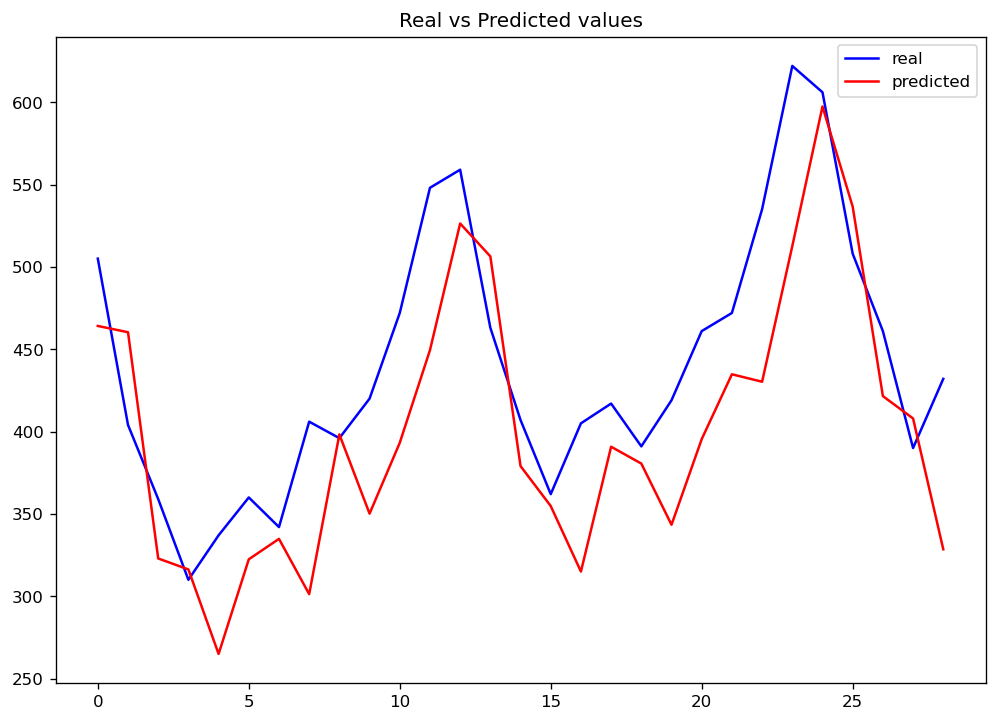

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.3, 0.5, 1.0],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train_scaled, Y_train_scaled)
pred = grid.predict(X_test)
calculate_metrics(Y_test, pred)
draw_true_predict(Y_test, pred)

Pipeline

MSE: 1.1488131731416207, MAPE: 0.5579578749161699, R2: -1.6423688174556572


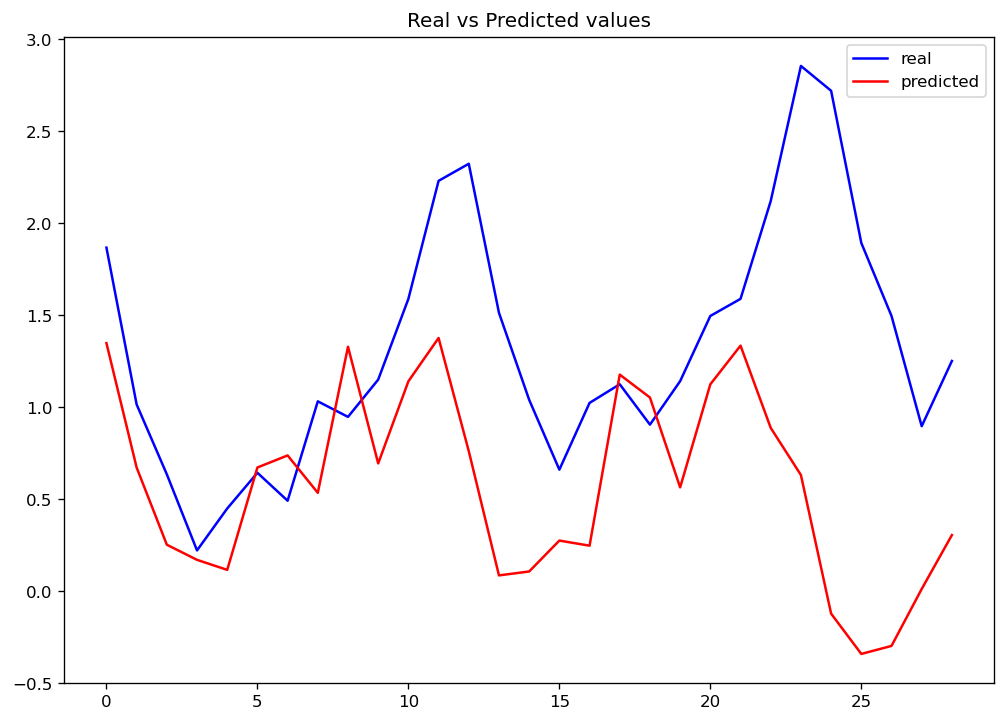

In [ ]:
# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=0)

# Make pipeline
pipe = make_pipeline(StandardScaler(), SVR(C=10, epsilon=0.2))
pipe.fit(X_train, Y_train)

# Make predictions
pred = pipe.predict(X_test)

# Calculate metrics
calculate_metrics(Y_test, pred)

draw_true_predict(Y_test, pred)